In [7]:
import sys 
sys.path.append('../')

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
%load_ext autoreload
%autoreload 2
from relation import Distribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
dis = Distribution('x',10,'140','')

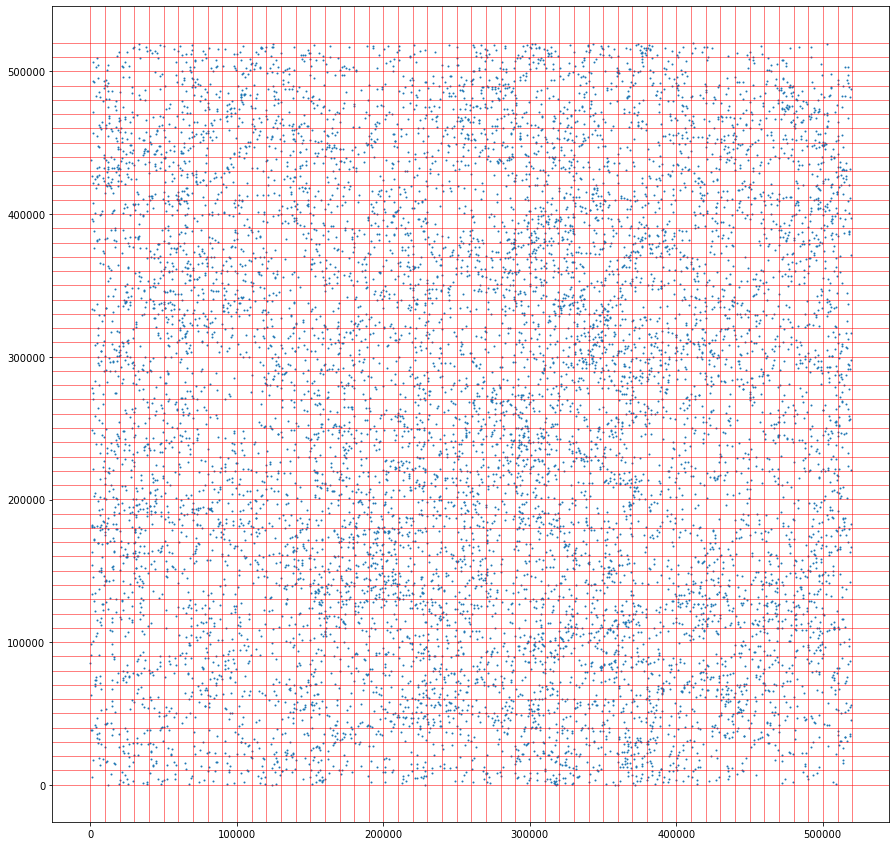

In [11]:
dis.plot()

In [12]:
dis.get_density()

Calculating mass of cells in y direction rows: 100%|██████████| 52/52 [02:14<00:00,  2.58s/row]


(array([7.1989203 , 8.71753101, 6.2354384 , ..., 0.49715742, 1.36225907,
        1.30877232]),
 array([2.06176134, 1.03088067, 1.80404117, ..., 2.06176134, 2.06176134,
        3.09264201]))

In [13]:
dis.add_density()

Density data added to dataframe


(0.0, 6.0)

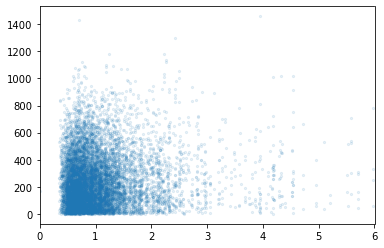

In [23]:
plt.figure(figsize=(15,15))
plt.scatter(dis.dataframe['mass_density'],np.abs(dis.dataframe['vx[km/s]']),s=5,alpha=0.1,label)
plt.xlim(0,6)

In [ ]:
dis.dataframe